In [22]:
# Load pacakges ----
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython.display import HTML
from IPython.display import Markdown as md
from IPython.core.display import HTML as Center
from config import marker, qof_measure_marker, start_date, end_date, demographics, codelist_path
from IPython.display import Image, display
import base64

from utilities import *
%matplotlib inline


# Changes and variation in QOF Blood Pressure targets
## Indicator: BP002 (Version: 46.0)
## Timeframe: 2019-09-01 and 2022-03-31

# Content

<ul id="docNav">

<li> <a href="#introduction">Introduction</a>

<li> <a href="#methods">Methods</a>
    <ul>
        <li> <a href="#business_rules">Business rules: indicator BP002</a>
    </ul>

<li> <a href="#results">Results</a>
        <ul>
            <li> <a href="#results_total">Total</a>
            <li> <a href="#results_var_gp">Variation across GP practices</a>
            <li> <a href="#results_by_sex">Breakdown by sex</a>
            <li> <a href="#results_by_age_band">Breakdown by age band</a>
            <li> <a href="#results_by_region">Breakdown by region</a>
            <li> <a href="#results_by_imd">Breakdown by IMD quintile</a>
            <li> <a href="#resultsby_ethnicity">Breakdown by ethnicity</a>
            <li> <a href="#results_by_learning_disability">Breakdown by learning disability recorded</a>
            <li> <a href="#results_by_care_home_status">Breakdown by care home status</a>
<li> <a href="#discussion">Discussion</a>
<li> <a href="#references">References</a>

<a id="introduction"></a>
# Introduction 

General practice has been disrupted by the pandemic in many clinical areas (e.g., [Curtis et al., 2021](https://bjgp.org/content/72/714/e63); [Williamson et al., 2020](https://www.nature.com/articles/s41586-020-2521-4)). High blood pressure is one of the leading risk factors for several diseases (e.g., cardiovascular disease, stroke) worldwide. 
Research suggests that delays in the management of high blood pressure are associated with worse clinical outcomes, for example acute cardiovascular events, or death ([Xu et al., 2015](https://www.bmj.com/content/350/bmj.h158)).

QOF PLACEHOLDER PARAGRAPH 
The [Quality and Outcomes Framework (QOF)](https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/general-practice-data-hub/quality-outcomes-framework-qof) outlines one indicator that focus on blood pressure (BP002). 

OpenSAFELY is a secure analytics platform for electronic patient records built by our group on behalf of NHS England to deliver urgent academic and operational research during the pandemic [Curtiset al., 2022](https://bjgp.org/content/72/714/e51), [Williamson, E.J. et al., 2020](https://www.nature.com/articles/s41586-020-2521-4). Analyses can currently run across all patients’ full pseudonymised primary care records, with patient-level linkage to various sources of secondary care data.

We set out to replicate the QOF business rules in OpenSAFELY-TPP and describe trends over time before and during the pandemic. We also describe how the indicator varies between key clinical, regional and demographic subgroups. 

<a id="methods"></a>
# Methods

Using OpenSAFELY-TPP, covering 40% of England's population, we have assessed QOF Blood Pressure targets (Indicator: BP002) between 2019-09-01 and 2022-03-31.
The codelist used can be found here at [OpenSAFELY Codelists](https://codelists.opensafely.org/).

The **study population** for each indicator is defined by the denominator rules shown above.
For each month within the study period, we have calculated the percentage of registered patients above 45 years that had their blood pressure recorded in the 5 year period leading up to the month of reporting.
All analytical code and output is available for inspection at the [OpenSAFELY GitHub repository](https://github.com/opensafely/blood-pressure-qof).

<a id="business_rules"></a>

## Business rules: indicator BP002

In this report we have replicated the QOF blood pressure indicator BP002 (v46.0): the percentage of patients aged 45 or over who have a record of blood pressure in the preceeding 5 years. The rules defining the denominator and numerator inclusion criteria are outlined below. 
More details about the rules can be found [here](https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-collections/quality-and-outcomes-framework-qof/quality-and-outcome-framework-qof-business-rules/qof-business-rules-v46.0-2021-2022-baseline-release).

### Denominator

| Rule number | Rule | Action if true | Action if false | Rule description or comments |
|:---|:---|:---|:---|:---| 
| 1 | If `PAT_AGE` < 45 | Reject | Next rule | Reject patients from the specified population who are aged less than 45 years old. |
| 2 | If `BP_DAT` > (`PPED` – 5 years) | Select | Next rule | Select patients passed to this rule who had their blood pressure recorded in the 5 year period leading up to and including the payment period end date. |
| 3 | If `BPDEC_DAT` > (`PPED` – 5 years)  | Reject | Next rule | Reject patients passed to this rule chose not to have their blood pressure recorded in the 5 year period leading up to and including the payment period end date. |
| 4 | If `REG_DAT` > (`PPED` – 3 months) | Reject | Select | Reject patients passed to this rule who registered with the GP practice in the 3 month period leading up to and including the payment period end date. |

### Numerator

| Rule number | Rule | Action if true | Action if false | Rule description or comments |
|:---|:---|:---|:---|:---| 
| 1 | If `BP_DAT` > (`PPED` – 5 years) | Select | Reject | Select patients from the denominator who had their blood pressure recorded in the 5 year period leading up to and including the payment period end date. Reject the remaining patients. |

### Codelists

The associated codelists for this indicator were implemented in OpenSAFELY-TPP as described in the QOF business rules. Details of these can be found [here](https://content.digital.nhs.uk/qofesextractspecs). Detailed information on compilation and sources for every individual codelist is available at https://www.opencodelists.org/

| Cluster name | Description | SNOMED CT |
|:---|:---|:---|
| [BP_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/bp_cod/20200812/) | Blood pressure (BP) recording codes | ^999012731000230108 |
| [BPDEC_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/bpdec_cod/20200812/) | Codes indicating the patient has chosen not to have blood pressure procedure | ^999012611000230106 |

Futher studies looking at blood pressure may also need to investigate home blood pressure management (see [HOMEBP_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/homebp_cod/20200812/) and [HOMEBPDEC_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/homebpdec_cod/20211221/)).

<a id="results"></a>
# Results

PLACEHOLDER FOR ANNUAL RESULTS
Dashboards presenting the annual targets of all QOF indicators published by NHSD are available [here](https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/general-practice-data-hub/quality-outcomes-framework-qof).

In [3]:
codelist = pd.read_csv(f'../{codelist_path}')

image_paths = {d: f'../output/plot_{d}.png' for d in demographics}
image_paths['total'] = '../output/plot_total.png'

<a id="results_bp002_total"></a>

### Percentage of patients above 45 years that had their blood pressure recorded in the last 5 years

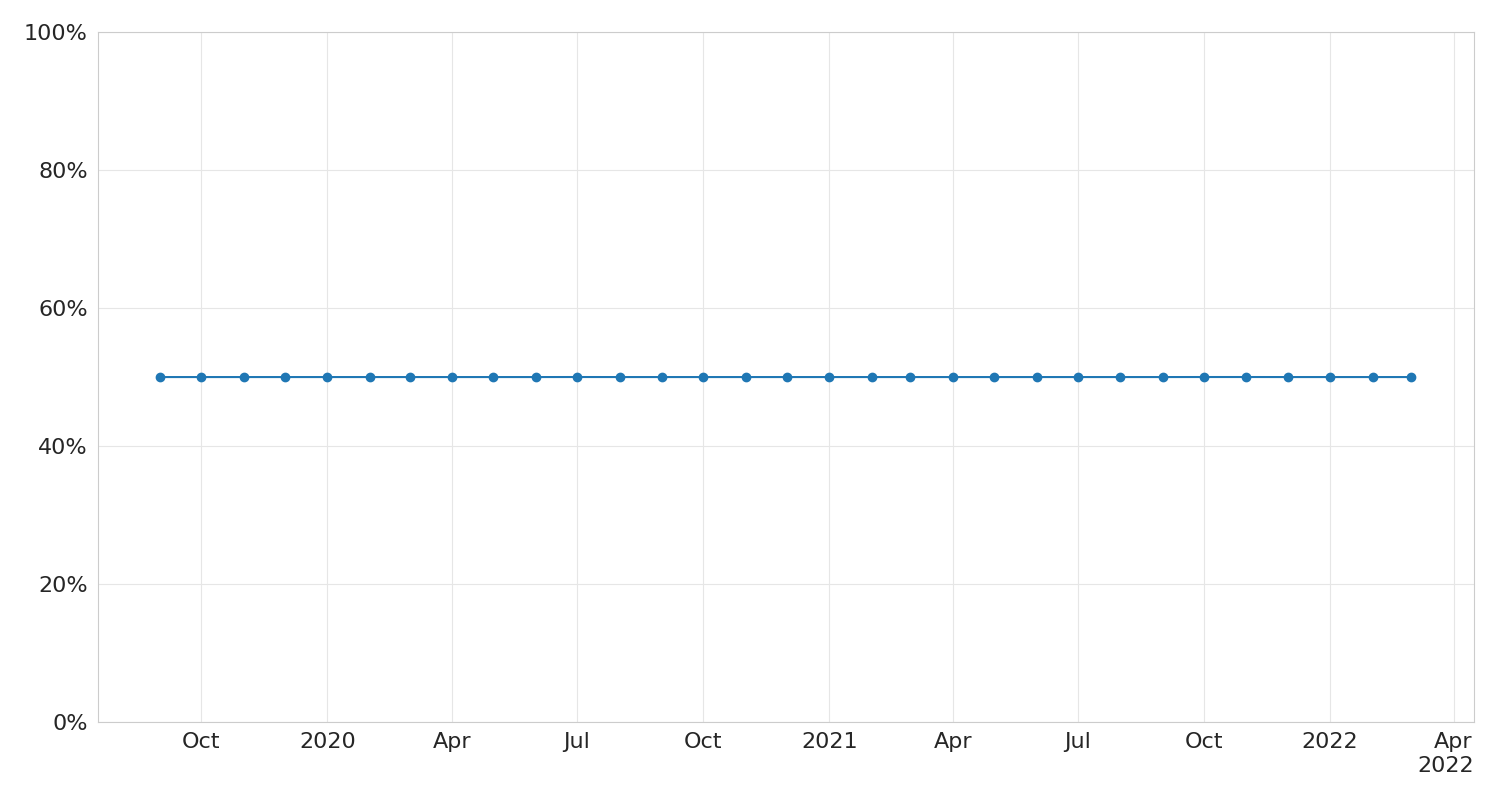

In [4]:
Image(filename=image_paths['total'])

<a id="results_bp002_var_gp"></a>
### Total Number by GP Practice

In [25]:
practice_table = pd.read_csv('../output/rate_table_practice.csv', parse_dates=['date']).sort_values(by='date')
percentage_practices = get_percentage_practices(practice_table)
md(f"Percentage of practices with a recording of a code within the [BP_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/bp_cod/20200812/) codelist during the study period: {percentage_practices}%")

Percentage of practices with a recording of a code within the [BP_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/bp_cod/20200812/) codelist during the study period: 97.78%

### Percentage of patients above 45 years that had their blood pressure recorded in the last 5 years across GP practices

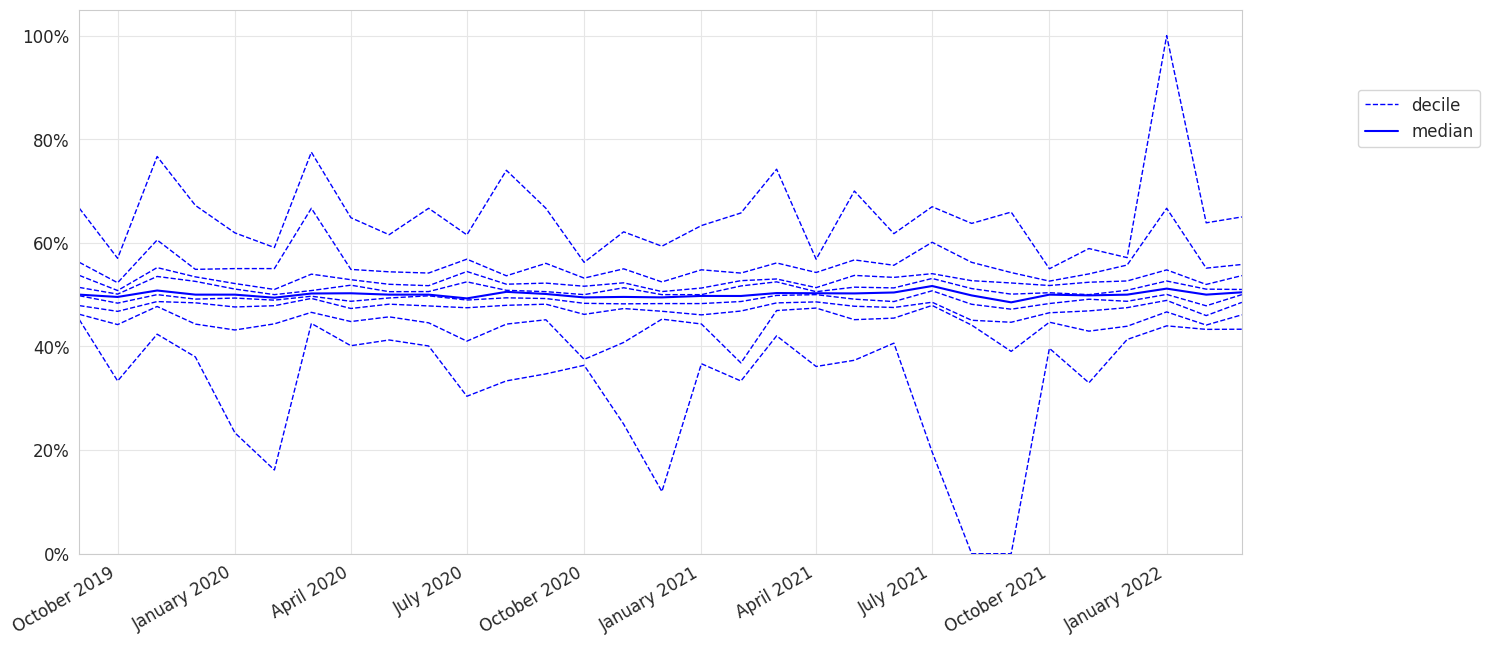

In [6]:
Image(filename='../output/decile_chart.png')

<a id="results_bp002_by_sex"></a>
### Breakdown of BP002 by 'sex'

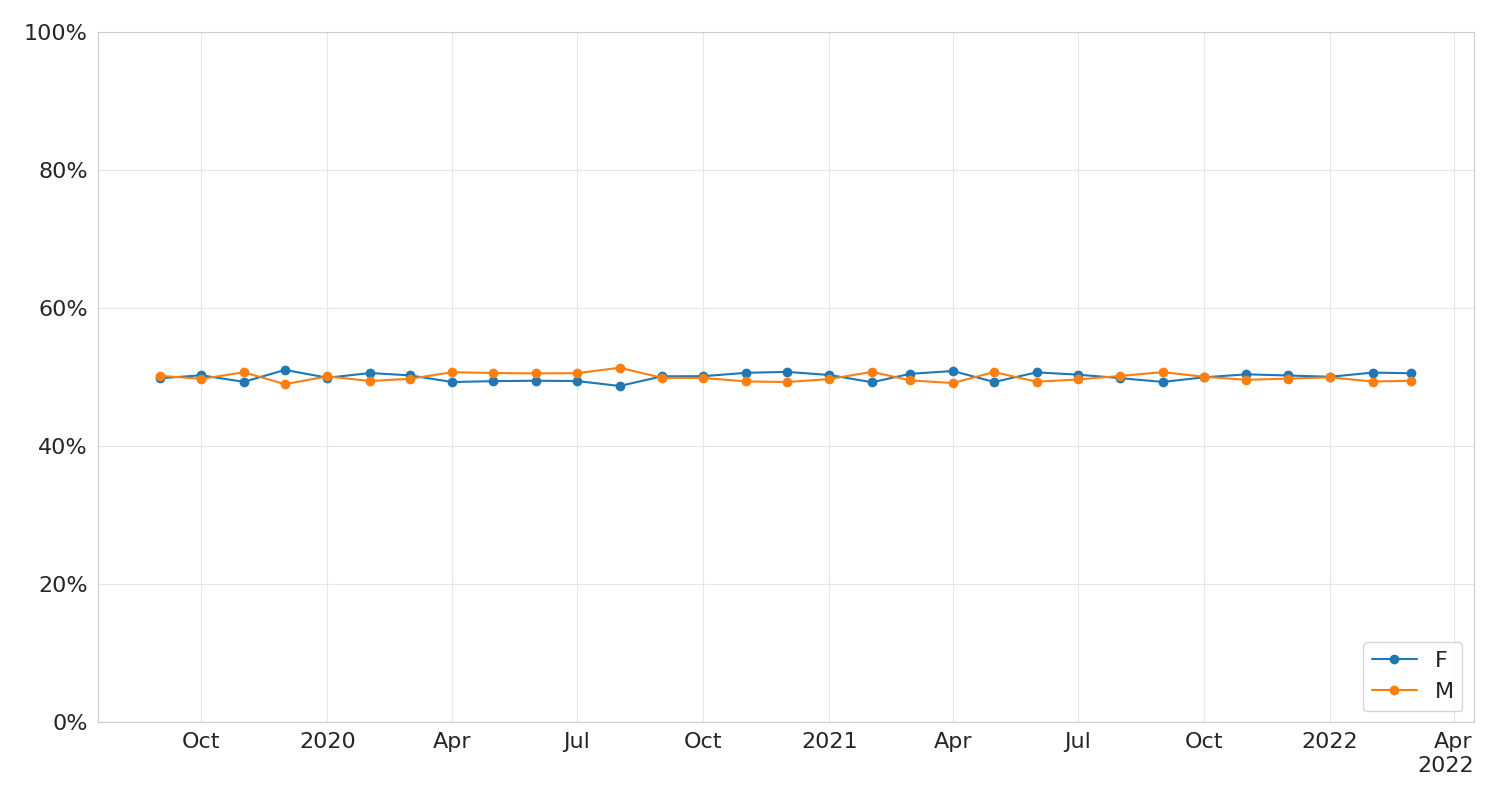

In [7]:
Image(filename=image_paths[demographics[0]])

<a id="results_bp002_by_age_band"></a>
### Breakdown of BP002 by 'age_band'

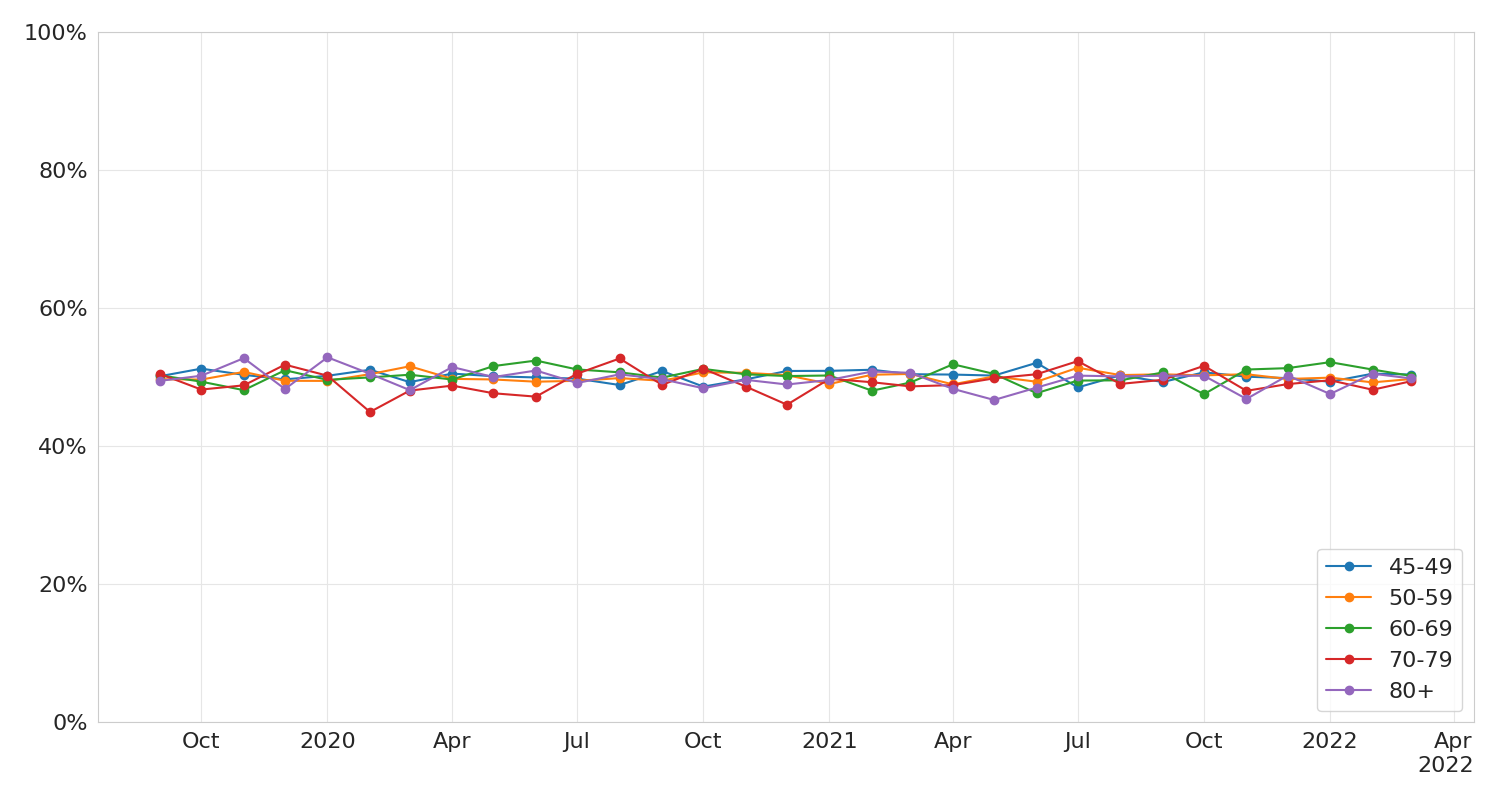

In [8]:
Image(filename=image_paths[demographics[1]])

<a id="results_bp002_by_region"></a>

### Breakdown of BP002 by 'region'

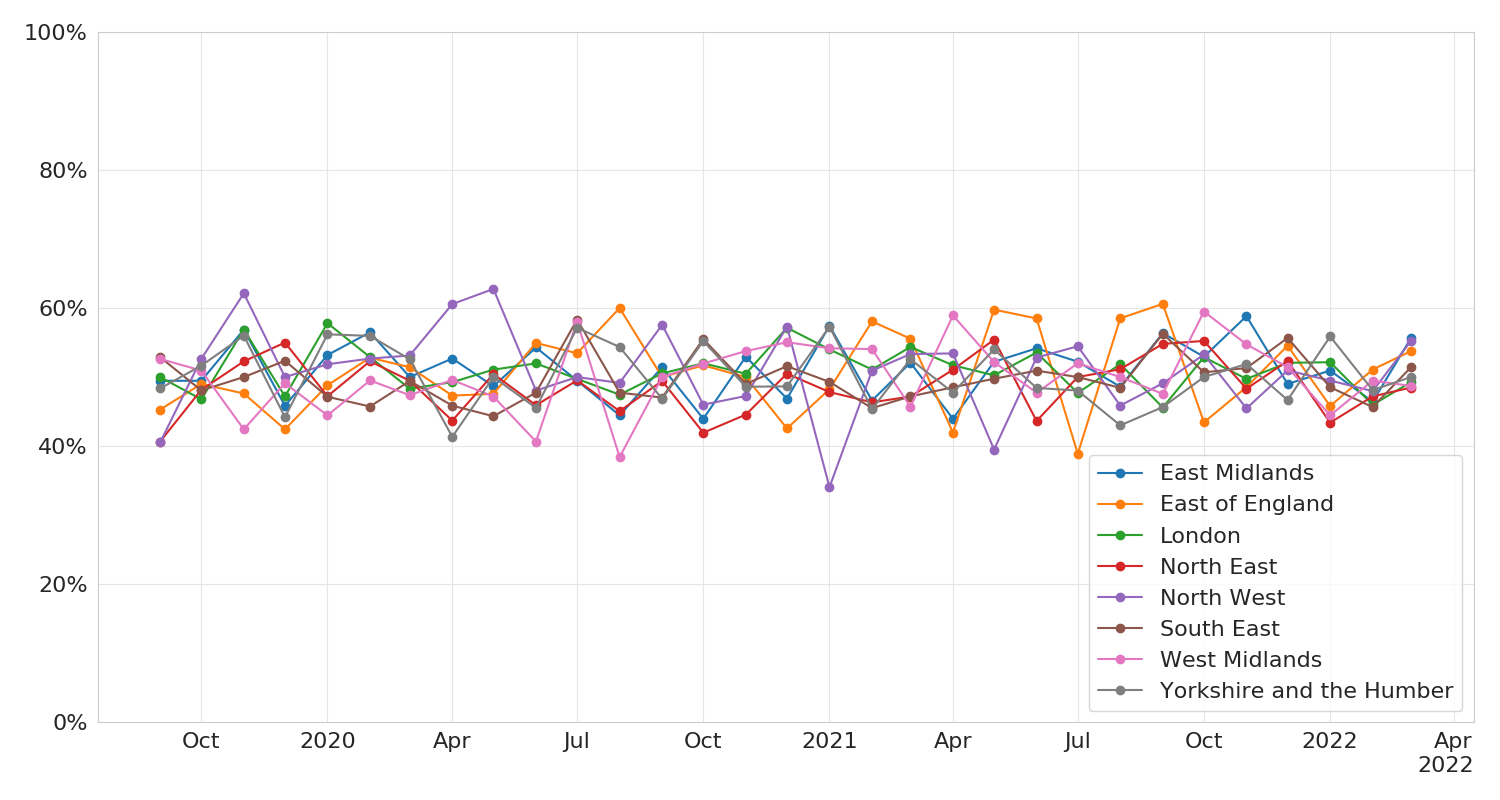

In [9]:
Image(filename=image_paths[demographics[2]])

<a id="results_bp002_by_imd"></a>

### Breakdown of BP002 by 'imd'

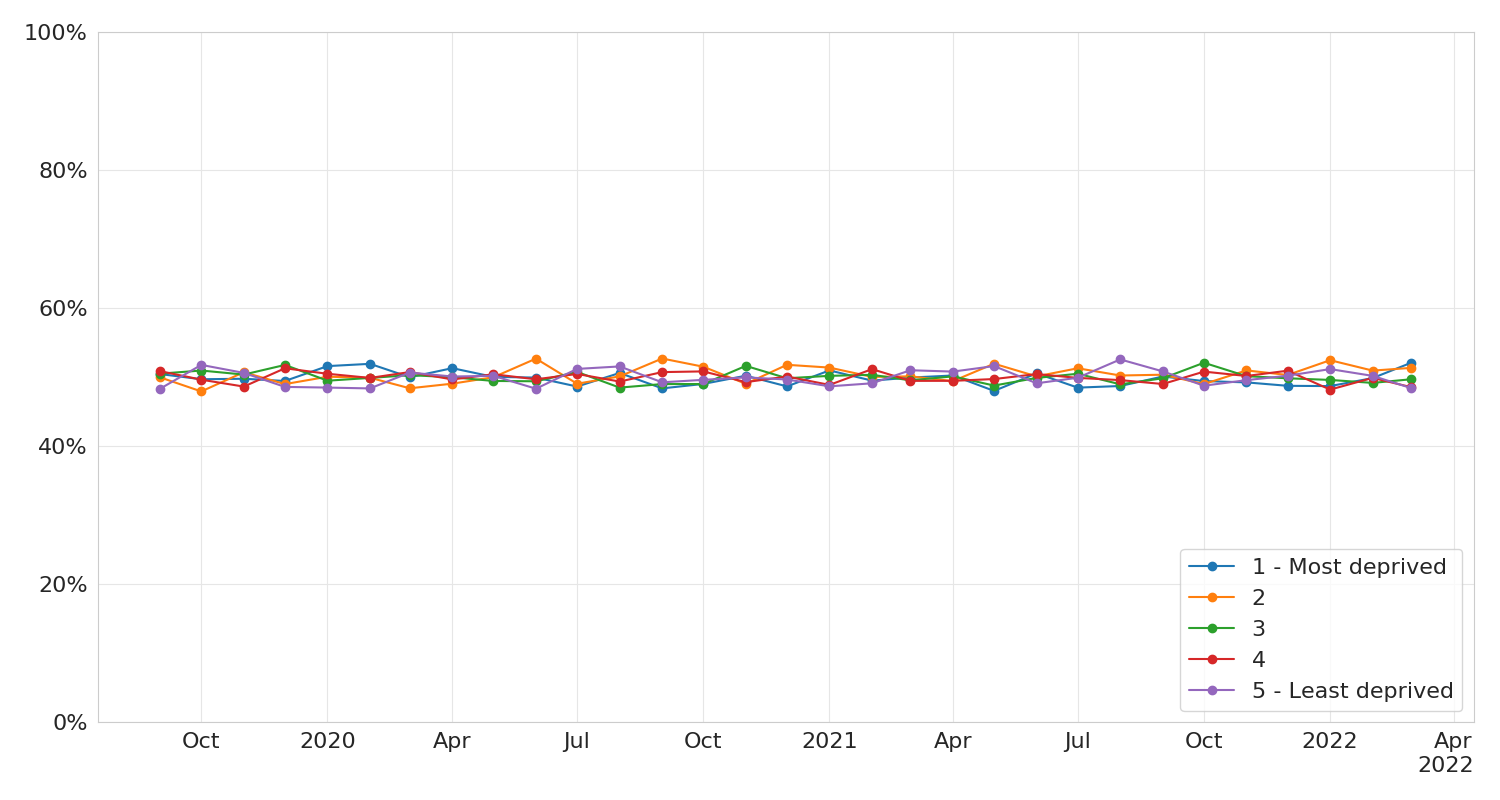

In [10]:
Image(filename=image_paths[demographics[3]])

<a id="results_bp002_by_ethnicity"></a>

### Breakdown of BP002 by 'ethnicity'

The codelist used for 'ethnicity' is available [here](https://www.opencodelists.org/codelist/opensafely/ethnicity/2020-04-27)

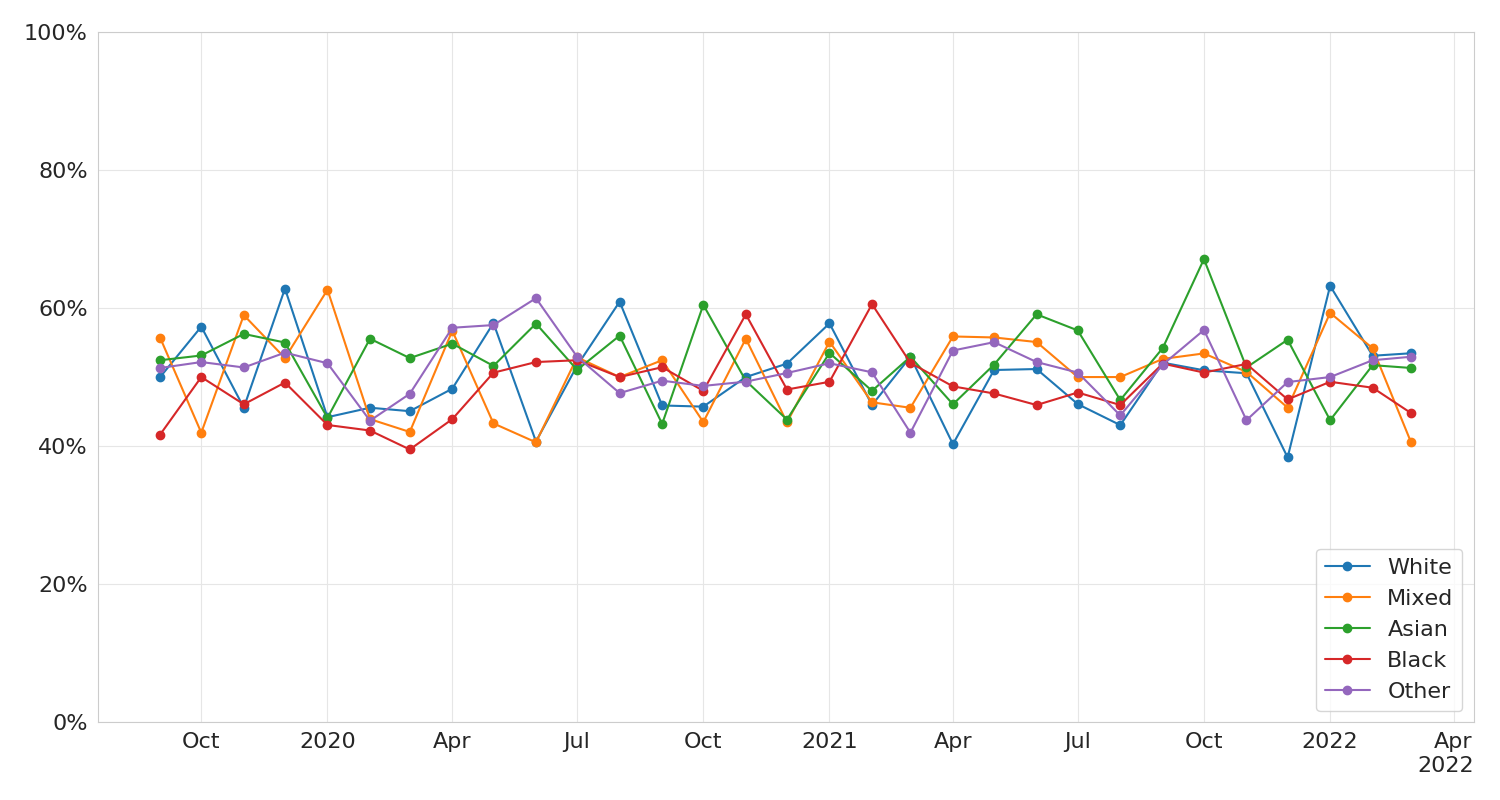

In [11]:
Image(filename=image_paths[demographics[4]])

<a id="results_bp002_by_learning_disability"></a>

### Breakdown of BP002 by 'learning_disability'

The codelist used for 'learning_disability' is available [here](https://www.opencodelists.org/codelist/opensafely/learning-disabilities/2020-07-06)

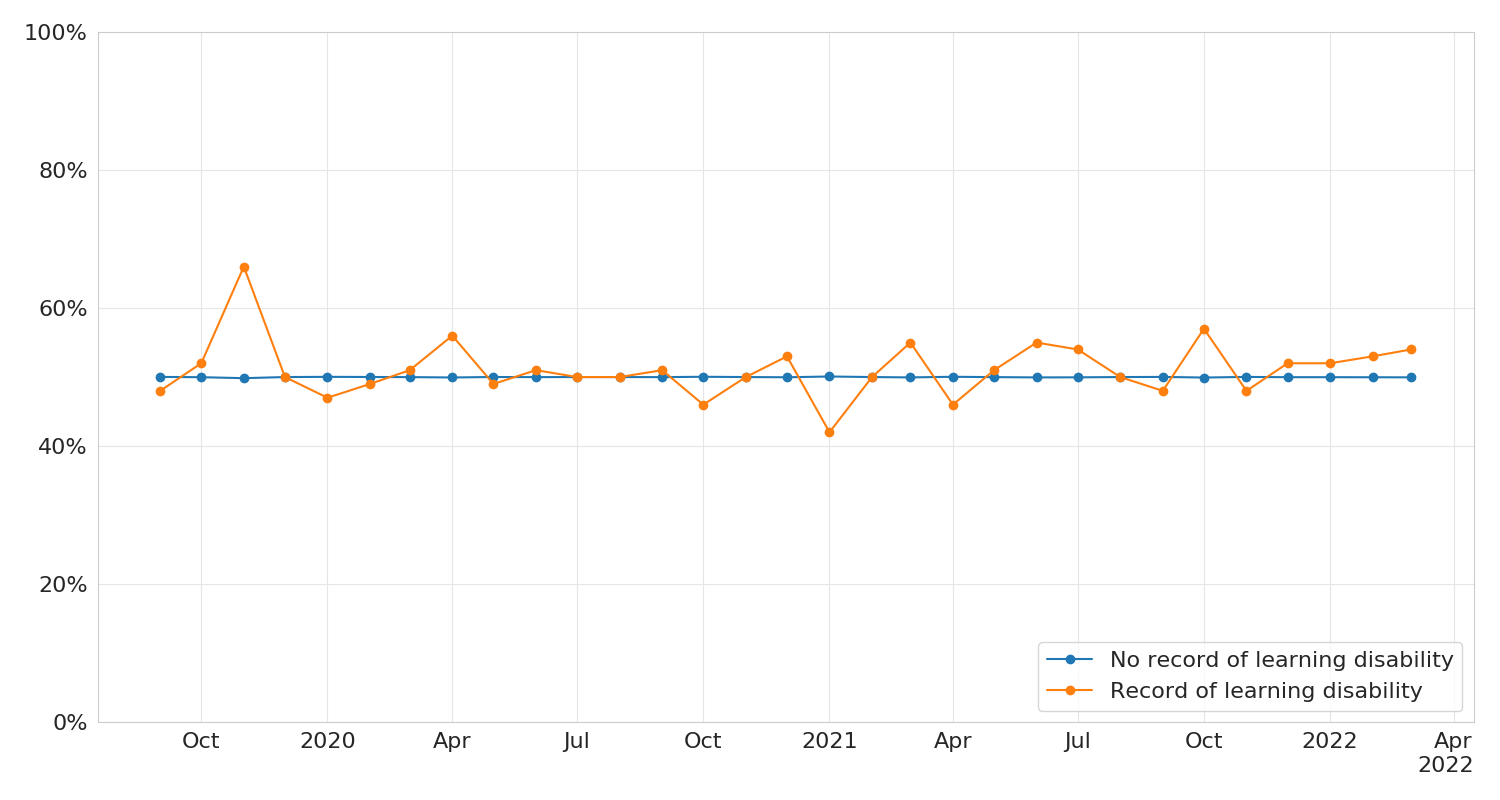

In [12]:
display(Image(filename=image_paths[demographics[5]]))

<a id="results_bp002_by_care_home_status"></a>

### Breakdown of BP002 by 'care_home_status'

The codelist used for 'care_home_status' is available [here](https://www.opencodelists.org/codelist/opensafely/nhs-england-care-homes-residential-status/3712ef13)

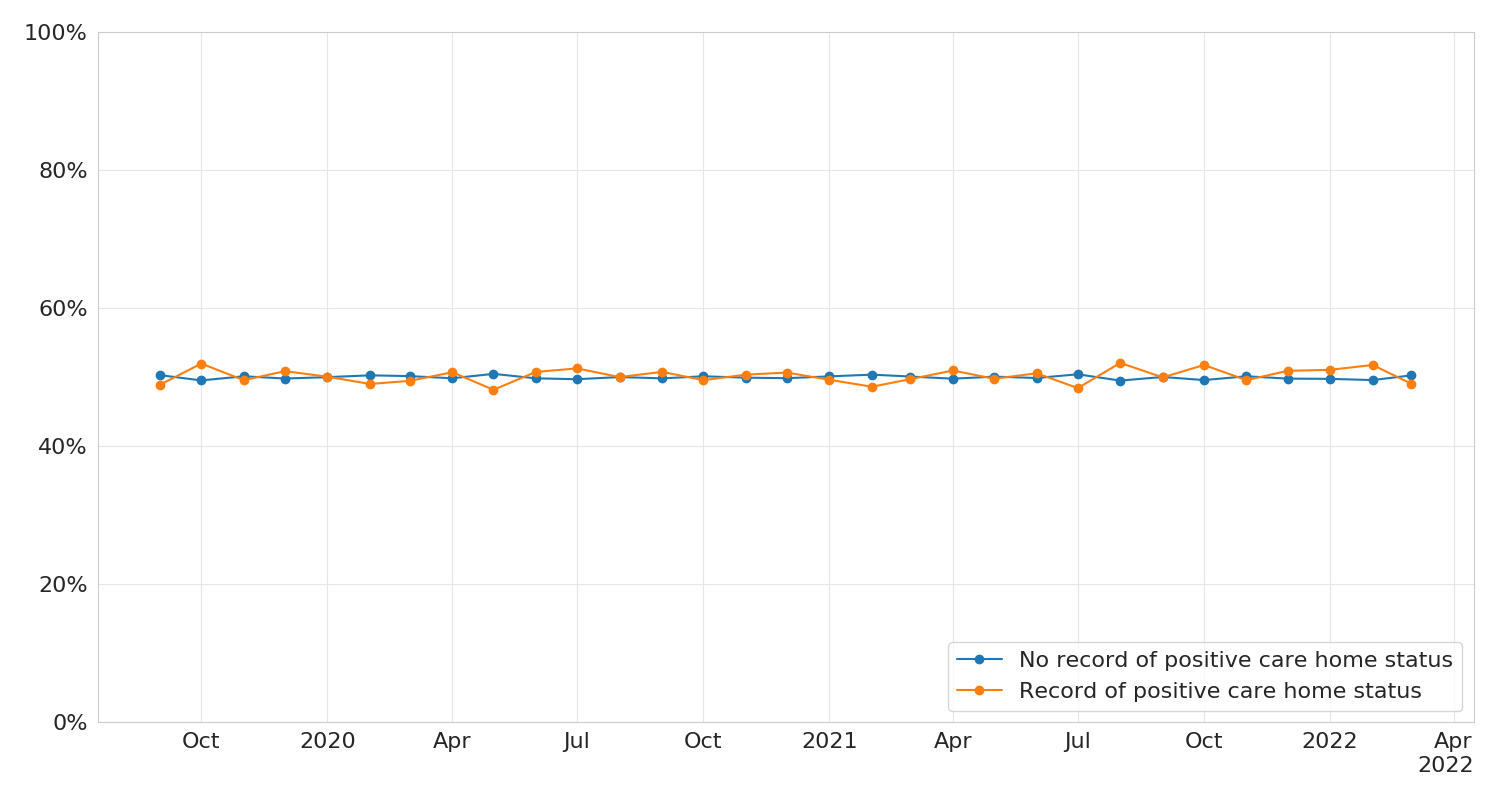

In [13]:
Image(filename=image_paths[demographics[6]]) 

<a id="references"></a>
# References 

1. Curtis HJ, MacKenna B, Croker R, Inglesby P, Walker AJ, Morley J, et al. OpenSAFELY NHS Service Restoration Observatory 1: describing trends and variation in primary care clinical activity for 23.3 million patients in England during the first wave of COVID-19. Br J Gen Pract [Internet]. 2021 Sep 20 [cited 2021 Oct 5]; Available from: https://bjgp.org/content/early/2021/09/24/BJGP.2021.0380
1. Williamson EJ, Walker AJ, Bhaskaran K, Bacon S, Bates C, Morton CE, et al. Factors associated with COVID-19-related death using OpenSAFELY. Nature. 2020 Aug;584(7821):430–6. https://www.nature.com/articles/s41586-020-2521-4
1. Xu W, Goldberg SI, Shubina M, Turchin A. Optimal systolic blood pressure target, time to intensification, and time to follow-up in treatment of hypertension: population based retrospective cohort study. BMJ. 2015 Feb 5;350:h158. https://www.bmj.com/content/350/bmj.h158

